In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

filename_df_raw = pd.read_csv("dataset1_raw.csv")

print("Raw dataset: \n") 
filename_df_raw.head(15)


# The raw data is already "Clean" looking. so we can clean it by dropping the columns we don't need and tightening up the story a bit and show that.
# we can show this by showing the unclean version headers, and then the clean version headers after dropping unnecessary data for our analysis.
# we can then check for Nan values and droppign them.




Raw dataset: 



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [2]:
# One edit we are doing here is converting the type of Exam_Scores from String to float. 
# we are doing this so we can use these data to analyze 
# how factors such as sleep or exercise can affect the performance of students

## Description: Exam score values were converted from object type to numeric format to enable quantitative analysis.

filename_df_raw["Exam_Score"] = pd.to_numeric(
    filename_df_raw["Exam_Score"],
    errors="coerce"
)
#filename_df["Exam_Score"].dtype

#filename_df["Exam_Score"].isna().sum()


In [3]:
print("Raw dataset headings: \n")
list(filename_df_raw.columns)

Raw dataset headings: 



['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [4]:
# SInce we want to compare and analyze how sleep and exercise affect acacdemic prodictivity, we decided to drop some columns that were considered 
# not relevant to the story we wished to tell.

cols_to_drop = [
    "Family_Income",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Peer_Influence",
    "Parental_Involvement"
]

filename_df = filename_df_raw.drop(columns=cols_to_drop)

#filename_df_clean.columns
#filename_df_clean.shape

#filename_df_clean.head(15)

print("Cleaned dataset with columns removed: \n")

list(filename_df)


Cleaned dataset with columns removed: 



['Hours_Studied',
 'Attendance',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Teacher_Quality',
 'School_Type',
 'Physical_Activity',
 'Learning_Disabilities',
 'Gender',
 'Exam_Score']

In [5]:
# Now we will check for any missing or null values in our dataset.

filename_df.isna().sum()


Hours_Studied                  0
Attendance                     0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Teacher_Quality               78
School_Type                    0
Physical_Activity              0
Learning_Disabilities          0
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
# Since teacher quality has many null/empty values, and it is also a column that doesnt directly relate to what we wih to observe, we decided to drop it.
cols_to_drop = ["Teacher_Quality"]

filename_df_clean = filename_df.drop(columns=cols_to_drop)

print("New cleaned file: \n")
list(filename_df_clean.columns)

New cleaned file: 



['Hours_Studied',
 'Attendance',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'School_Type',
 'Physical_Activity',
 'Learning_Disabilities',
 'Gender',
 'Exam_Score']

In [7]:
#Checking one more time to see if we missed any null/empty vaules
filename_df_clean.isna().sum()

Hours_Studied                 0
Attendance                    0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
School_Type                   0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
# Saving he cleaned up data in a new dataset

filename_df_clean.to_csv("dataset1_clean.csv", index=False)

print("Cleaned data set: \n")

filename_df_clean.head(15)

Cleaned data set: 



,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,High,No,7,73,Low,Yes,0,Public,3,No,Male,67
1,19,64,Medium,No,8,59,Low,Yes,2,Public,4,No,Female,61
2,24,98,Medium,Yes,7,91,Medium,Yes,2,Public,4,No,Male,74
3,29,89,Medium,Yes,8,98,Medium,Yes,1,Public,4,No,Male,71
4,19,92,Medium,Yes,6,65,Medium,Yes,3,Public,4,No,Female,70
5,19,88,Medium,Yes,8,89,Medium,Yes,3,Public,3,No,Male,71
6,29,84,Low,Yes,7,68,Low,Yes,1,Private,2,No,Male,67
7,25,78,High,Yes,6,50,Medium,Yes,1,Public,2,No,Male,66
8,17,94,High,No,6,80,High,Yes,0,Private,1,No,Male,69
9,23,98,Medium,Yes,8,71,Medium,Yes,0,Public,5,No,Male,72


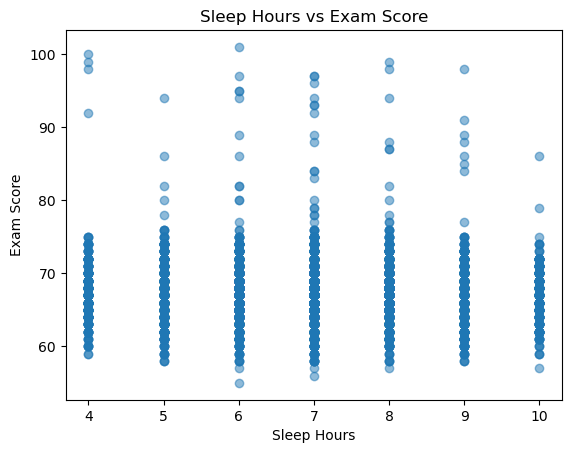

In [10]:
# This scatter plot illustrates the relationship between sleep duration and exam score. 
# The wide dispersion of points suggests that sleep hours alone may not strongly predict academic performance in this dataset.

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(filename_df_clean["Sleep_Hours"], filename_df_clean["Exam_Score"], alpha=0.5)
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Sleep Hours vs Exam Score")
plt.show()


In [ ]:
#check correlation between sleep and exam score. if correlation is low, that's okay. it means that while sleep might not
# directly affect exam scores in this particular dataset, it may affect it indirectly.

<Figure size 640x480 with 0 Axes>

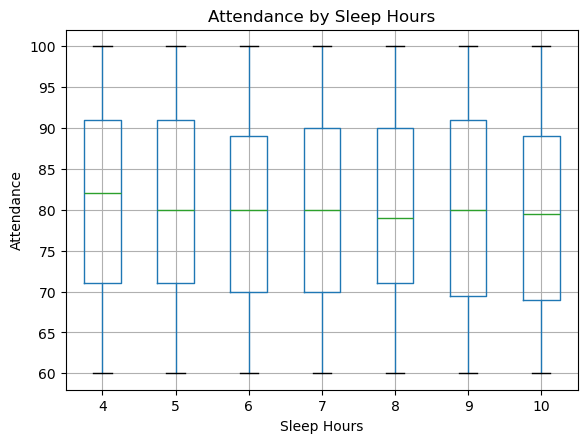

In [11]:
# This scatter plot examines the relationship between sleep duration and student attendance.
# The visualization helps assess whether students who sleep more tend to attend classes more consistently.

plt.figure()
filename_df.boxplot(column="Attendance", by="Sleep_Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Attendance")
plt.title("Attendance by Sleep Hours")
plt.suptitle("")
plt.show()



<Figure size 640x480 with 0 Axes>

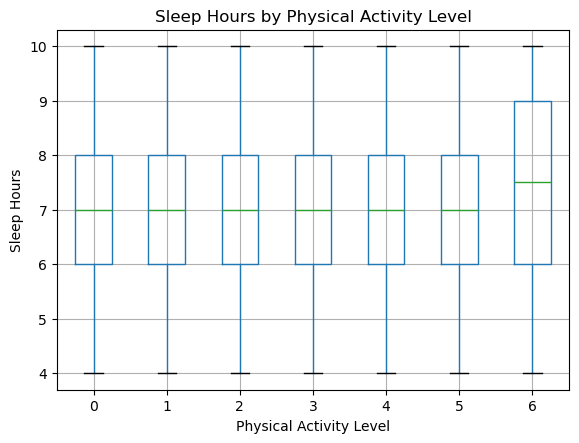

In [15]:
# This boxplot compares sleep duration across different physical activity levels.
# Differences in medians and variability highlight how sleep patterns may vary by activity engagement.

plt.figure()
filename_df.boxplot(column="Sleep_Hours", by="Physical_Activity")
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Hours")
plt.title("Sleep Hours by Physical Activity Level")
plt.suptitle("")
plt.show()


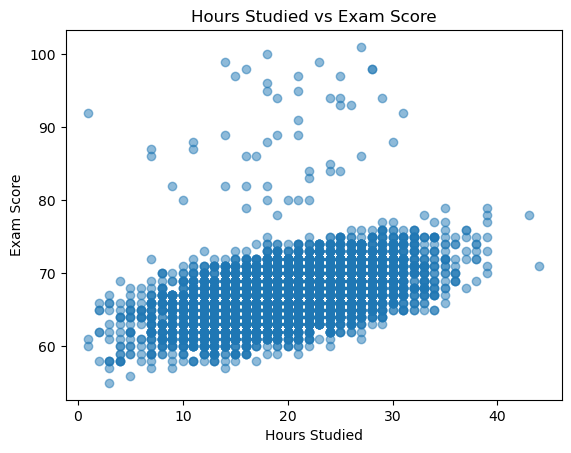

In [9]:
# This scatter plot explores the relationship between time spent studying and academic performance, a key productivity indicator.
plt.figure()
plt.scatter(filename_df["Hours_Studied"], filename_df["Exam_Score"], alpha=0.5)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()


<Figure size 640x480 with 0 Axes>

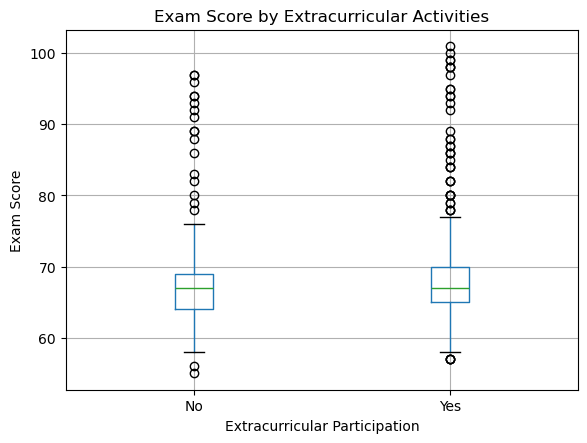

In [10]:
#This visualization compares exam performance between students who do and do not participate in extracurricular activities.


plt.figure()
filename_df.boxplot(column="Exam_Score", by="Extracurricular_Activities")
plt.xlabel("Extracurricular Participation")
plt.ylabel("Exam Score")
plt.title("Exam Score by Extracurricular Activities")
plt.suptitle("")
plt.show()


In [11]:
filename_df["Extracurricular_Activities"].value_counts()


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

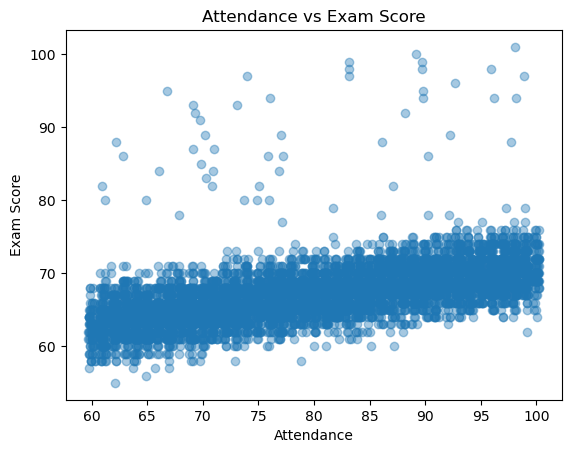

In [13]:
# This plot examines whether students with higher attendance tend to achieve higher exam scores,
# highlighting attendance as an engagement-related factor in academic productivity.

x = filename_df["Attendance"].astype(float)
y = filename_df["Exam_Score"].astype(float)

# Add jitter to attendance (since it’s discrete)
x_j = x + np.random.uniform(-0.3, 0.3, size=len(x))

plt.figure()
plt.scatter(x_j, y, alpha=0.4)
plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.title("Attendance vs Exam Score")
plt.show()


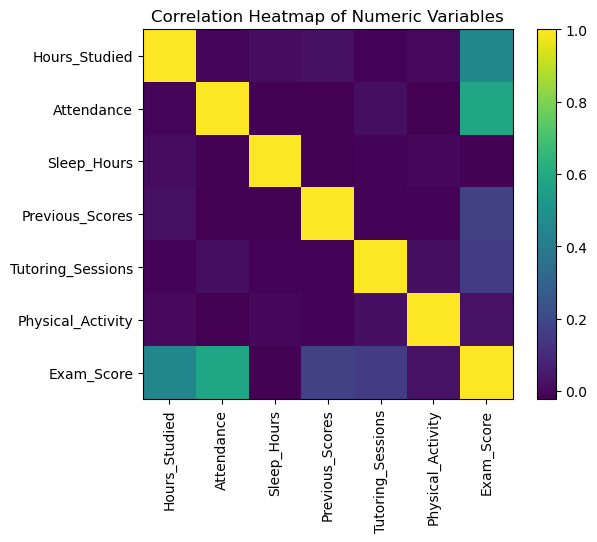

In [14]:
# Select only numeric columns
# This heatmap displays correlations among numeric variables in the dataset,
# highlighting which lifestyle and academic factors are most strongly associated with exam performance.

numeric_df = filename_df.select_dtypes(include="number")

corr = numeric_df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

<Figure size 640x480 with 0 Axes>

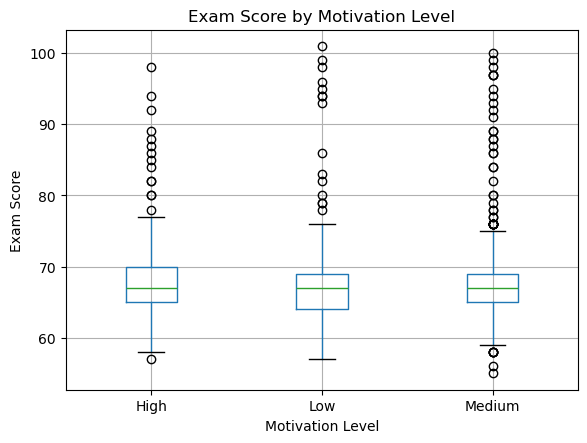

In [15]:
#This boxplot compares exam score distributions across motivation levels,
#helping assess whether more motivated students tend to achieve higher academic outcomes.

plt.figure()
filename_df.boxplot(column="Exam_Score", by="Motivation_Level")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")
plt.title("Exam Score by Motivation Level")
plt.suptitle("")
plt.show()


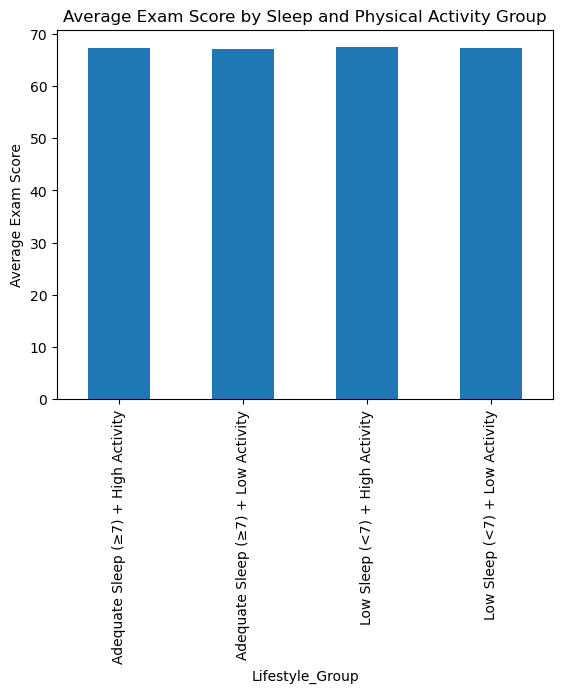

In [17]:
#This visualization explores the combined influence of sleep duration
# and physical activity on academic performance by comparing average exam scores across lifestyle groups.


filename_df["Sleep_Group"] = filename_df["Sleep_Hours"].apply(
    lambda x: "Low Sleep (<7)" if x < 7 else "Adequate Sleep (≥7)"
)

filename_df["Activity_Group"] = filename_df["Physical_Activity"].apply(
    lambda x: "Low Activity" if x <= filename_df["Physical_Activity"].median()
    else "High Activity"
)

filename_df["Lifestyle_Group"] = filename_df["Sleep_Group"] + " + " + filename_df["Activity_Group"]

group_means = filename_df.groupby("Lifestyle_Group")["Exam_Score"].mean()

plt.figure()
group_means.plot(kind="bar")
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Sleep and Physical Activity Group")
plt.show()


<Figure size 640x480 with 0 Axes>

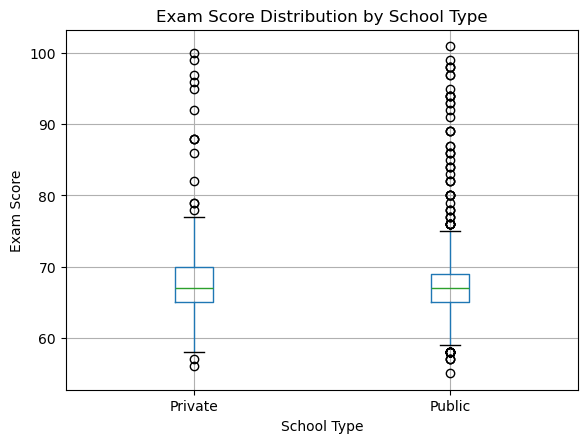

In [18]:
import matplotlib.pyplot as plt

plt.figure()
filename_df.boxplot(column="Exam_Score", by="School_Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.title("Exam Score Distribution by School Type")
plt.suptitle("")
plt.show()


In [19]:
# There appears to be many outliers in the box plots, so we decided t ocheck if the outliers were normal for the dataset or 
# require clean up.


Q1 = filename_df["Exam_Score"].quantile(0.25)
Q3 = filename_df["Exam_Score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 59.0
Upper bound: 75.0


In [20]:
outliers = filename_df[
    (filename_df["Exam_Score"] < lower_bound) |
    (filename_df["Exam_Score"] > upper_bound)
]

print("Number of outliers:", len(outliers))
outliers[["Exam_Score", "Sleep_Hours", "Physical_Activity", "Hours_Studied"]].head()


Number of outliers: 104


,Exam_Score,Sleep_Hours,Physical_Activity,Hours_Studied
94,100,4,2,18
106,76,7,5,31
113,79,7,2,35
209,78,7,1,43
217,89,7,2,19


In [26]:
filename_df[["Sleep_Hours", "Physical_Activity", "Hours_Studied", "Attendance"]].agg(["min", "max"])





,Sleep_Hours,Physical_Activity,Hours_Studied,Attendance
min,4,0,1,60
max,10,6,44,100


In [27]:
len(outliers) / len(filename_df) * 100


1.5740880883911001

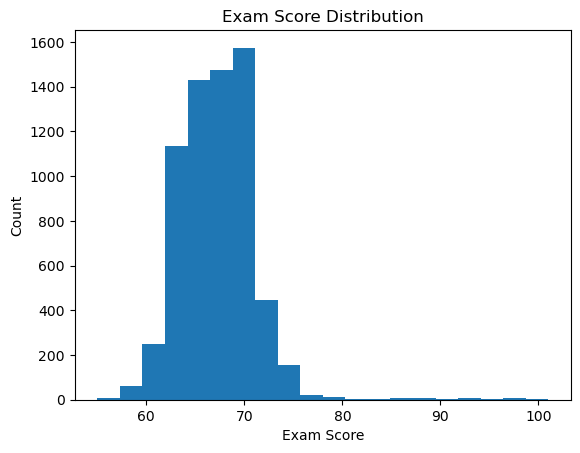

In [23]:
plt.figure()
plt.hist(filename_df["Exam_Score"], bins=20)
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()
